In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/lionel_messi5.jpg')
img.shape

(922, 736, 3)

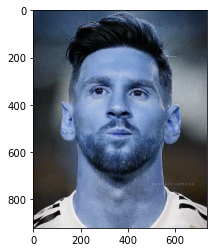

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(922, 736)

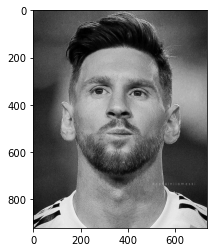

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[145, 160, 445, 445]], dtype=int32)

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(145, 160, 445, 445)

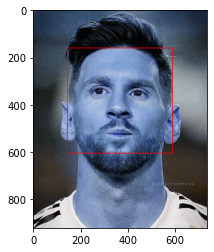

In [8]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

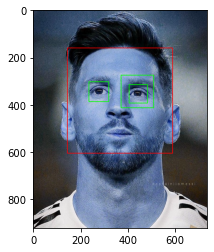

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

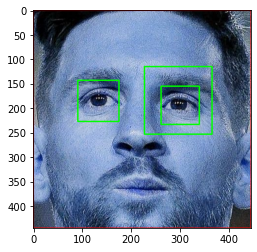

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_image_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

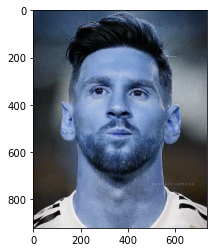

In [12]:
org_img=cv2.imread('./test_images/lionel_messi5.jpg')
plt.imshow(org_img)

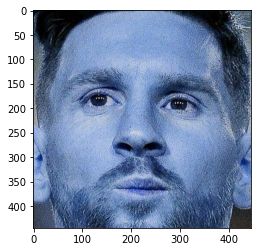

In [13]:
cr_img=get_cropped_image_2_eyes('./test_images/lionel_messi5.jpg')
plt.imshow(cr_img)

In [14]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cr_img_dirs = []
celeb_file_name_dict = {}


for img_dir in img_dirs:
    
    count = 1
    
    celeb_name = img_dir.split('/')[-1]
    celeb_file_name_dict[celeb_name] = []
    
    for entry in os.scandir(img_dir):
        
        roi_color = get_cropped_image_2_eyes(entry.path)
        if roi_color is not None:
            cr_folder = path_to_cr_data + celeb_name
            if not os.path.exists(cr_folder):
                os.makedirs(cr_folder)
                cr_img_dirs.append(cr_folder)
                print("Generating cropped images in folder: ",cr_folder)
            cr_file_name = celeb_name + str(count) + ".png"
            cr_file_path = cr_folder + "/" + cr_file_name
            
            cv2.imwrite(cr_file_path, roi_color)
            
            celeb_file_name_dict[celeb_name].append(cr_file_path)
            
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [19]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /= 255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H


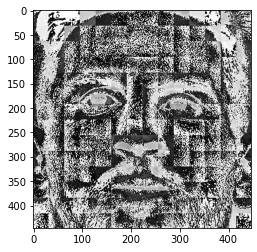

In [20]:
im_har=w2d(cr_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [21]:
celeb_file_name_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [22]:
class_dict={}
count=0
for celeb_name in celeb_file_name_dict.keys():
    class_dict[celeb_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [23]:
X=[]
y=[]
for celeb_name, training_files in celeb_file_name_dict.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])

In [24]:
len(X)

291

In [25]:
X[0]

array([[244],
       [247],
       [251],
       ...,
       [ 45],
       [ 44],
       [ 24]], dtype=uint8)

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(291, 4096)

In [27]:
X[0]

array([244., 247., 251., ...,  45.,  44.,  24.])

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8082191780821918

In [31]:
len(X_test)

73

In [32]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.73      0.94      0.82        17
           2       1.00      0.60      0.75         5
           3       0.72      0.72      0.72        18
           4       0.88      0.88      0.88        26

    accuracy                           0.81        73
   macro avg       0.87      0.74      0.78        73
weighted avg       0.83      0.81      0.81        73



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.853383,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.701480,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871776,{'logisticregression__C': 1}


In [99]:
best_estimators['svm'].score(X_test,y_test)

0.8108108108108109

In [100]:
best_estimators['random_forest'].score(X_test,y_test)

0.7567567567567568

In [101]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8108108108108109

In [102]:
best_clf=best_estimators['svm']

In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 4,  1,  0,  0,  2],
       [ 0, 17,  0,  1,  0],
       [ 0,  1,  3,  2,  1],
       [ 0,  1,  1, 15,  2],
       [ 0,  2,  0,  0, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

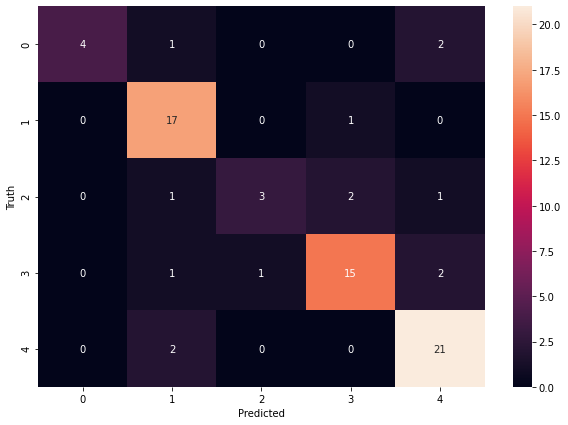

In [104]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [107]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [108]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))